<a href="https://colab.research.google.com/github/svmamidi/my-project/blob/main/Data_Prepration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the libraries
import math
from math import radians, cos, sin, asin, acos, sqrt, pi
import pandas as pd
import numpy as np
from datetime import time
import datetime as dt
from datetime import datetime as datetime
from datetime import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import seaborn as sns

In [ ]:
from google.colab import files                       #loading dataset


uploaded = files.upload()

Saving subject-info.csv to subject-info (1).csv
Saving test_measure.csv to test_measure (1).csv


In [ ]:
import pandas as pd
import io

data_info = pd.read_csv(io.BytesIO(uploaded['subject-info (1).csv']))   #loading dataset in DataFrame
data_test = pd.read_csv(io.BytesIO(uploaded['test_measure (1).csv']))
print(data_info )

    ID  age  Weight  Height  P_vt1  P_vt2      sport
0    1   15    53.7     161     50    140    fencing
1    2   15    56.2     162     80    127    fencing
2    3   16    89.9     191    155    300    fencing
3    4   16    76.5     180    215    275    fencing
4    5   17    76.4     186    110    172    fencing
5    6   17    65.6     169    131    186    fencing
6    7   15    49.8     165     65    108    fencing
7    8   15    51.2     165     80    133    fencing
8    9   14    57.1     176     50    125    fencing
9   10   14    58.8     177    101    162    fencing
10  11   18    84.8     182    174    268      kayak
11  12   18    86.0     183    170    294      kayak
12  13   18    83.9     183    144    267      kayak
13  14   13    62.3     171    140    170      kayak
14  15   13    63.5     172    125    156      kayak
15  16   16    70.4     182     79    175      kayak
16  17   12    39.9     156    101    145  triathlon
17  18   12    39.7     158     65    168  tri

In [ ]:
data_info.dtypes                     # datatypes of data_info

ID          int64
age         int64
Weight    float64
Height      int64
P_vt1       int64
P_vt2       int64
sport      object
dtype: object

In [ ]:
data_test.dtypes                      #datatype of data_test

ID         int64
time     float64
RR       float64
VO2      float64
power      int64
dtype: object

In [ ]:
data_info.isnull().sum()                #finding missing values

ID        0
age       0
Weight    0
Height    0
P_vt1     0
P_vt2     0
sport     0
dtype: int64

In [ ]:
data_test.isnull().sum() #finding missing values in data_test

ID          0
time        0
RR       1148
VO2         0
power       0
dtype: int64

In [ ]:
data_test_new=data_test.interpolate()    #using interpolation for handing missing values

In [ ]:
data_test_new   # reading DataFrame



,ID,time,RR,VO2,power
0,1,-130.840,672.0,0.302008,0
1,1,-130.168,672.0,0.302008,0
2,1,-129.536,632.0,0.301336,0
3,1,-128.824,712.0,0.301336,0
4,1,-127.948,876.0,0.301336,0
...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0
52058,18,947.816,528.0,0.507071,0
52059,18,948.344,528.0,0.507071,0
52060,18,948.884,540.0,0.507071,0


In [ ]:
data_info.dtypes[data_info.dtypes =='int64']  #finding integer data


ID        int64
age       int64
Height    int64
P_vt1     int64
P_vt2     int64
dtype: object

In [ ]:
data_info['ID']= data_info['ID'].astype('category')  #Typecasting ID to Object

In [ ]:
data_info.dtypes[data_info.dtypes =='float64']  # finding Floating data

Weight    float64
dtype: object

In [ ]:
data_info.dtypes[data_info.dtypes =='object']  # finding object data

sport    object
dtype: object

In [ ]:
data_info.dtypes

ID        category
age          int64
Weight     float64
Height       int64
P_vt1        int64
P_vt2        int64
sport       object
dtype: object

In [ ]:
data_test_new.dtypes[data_test_new.dtypes =='int64']

ID       int64
power    int64
dtype: object

In [ ]:
data_test_new['ID']= data_test_new['ID'].astype('category')

In [ ]:
data_test_new.dtypes[data_test_new.dtypes =='float64']

time    float64
RR      float64
VO2     float64
dtype: object

In [ ]:
data_test_new.dtypes[data_test_new.dtypes =='object']

Series([], dtype: object)

In [ ]:
data_test_new.dtypes

ID       category
time      float64
RR        float64
VO2       float64
power       int64
dtype: object

In [ ]:
data_info.dtypes

ID        category
age          int64
Weight     float64
Height       int64
P_vt1        int64
P_vt2        int64
sport       object
dtype: object

In [ ]:
numerical_cols = data_info.select_dtypes(include=['int', 'float']).columns #listing numerical data

numerical_cols

Index(['age', 'Weight', 'Height', 'P_vt1', 'P_vt2'], dtype='object')

In [ ]:
numerical_cols1 =data_test_new.select_dtypes(include=['int', 'float']).columns

numerical_cols

Index(['age', 'Weight', 'Height', 'P_vt1', 'P_vt2'], dtype='object')

In [ ]:
 data_info[numerical_cols].max()   #finding maximum of all columns in data_info

age        18.0
Weight     89.9
Height    191.0
P_vt1     215.0
P_vt2     300.0
dtype: float64

In [ ]:
data_test_new[numerical_cols1].max()

time      1504.056000
RR       30500.000000
VO2          4.576774
power      335.000000
dtype: float64

In [ ]:
data_test_new[numerical_cols1].min()

time    -219.872000
RR       252.000000
VO2        0.069354
power      0.000000
dtype: float64

In [ ]:
data_info.describe(include=[int, float])

,age,Weight,Height,P_vt1,P_vt2
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,15.222222,64.761111,173.277778,113.055556,187.277778
std,1.957055,15.545120,10.447660,46.949876,63.292789
min,12.000000,39.700000,156.000000,50.000000,108.000000
25%,14.000000,54.325000,165.000000,79.250000,141.250000
50%,15.000000,62.900000,174.000000,105.500000,169.000000
75%,16.750000,76.475000,182.000000,143.000000,246.750000
max,18.000000,89.900000,191.000000,215.000000,300.000000


In [ ]:
data_test_new.describe(include=[int, float])

,time,RR,VO2,power
count,52062.00000,52062.000000,52062.000000,52062.000000
mean,547.45914,441.577696,1.539104,106.528754
std,386.29623,210.667655,0.799706,88.603627
min,-219.87200,252.000000,0.069354,0.000000
25%,244.29500,352.000000,0.972290,0.000000
50%,542.03800,408.000000,1.419143,95.000000
75%,822.13900,484.000000,2.043474,170.000000
max,1504.05600,30500.000000,4.576774,335.000000


In [ ]:
data_test_new.isnull().sum()

ID       0
time     0
RR       0
VO2      0
power    0
dtype: int64

<ipython-input-29-88db95e8228e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test_new.RR)


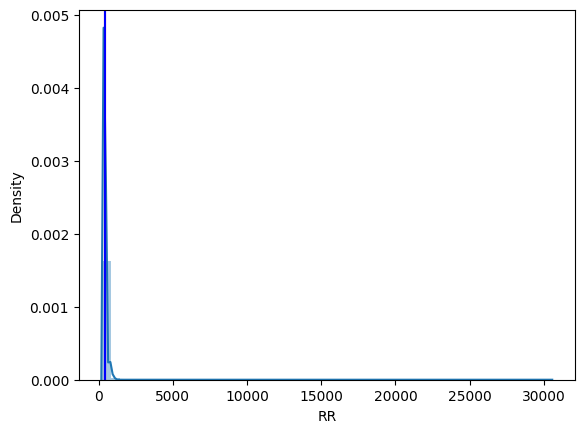

In [ ]:
sns.distplot(data_test_new.RR)
plt.axvline(data_test_new.RR.mean(),color='r')
plt.axvline(data_test_new.RR.median(),color='b')
plt.show()

<ipython-input-30-1327139d2fed>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test_new.power)


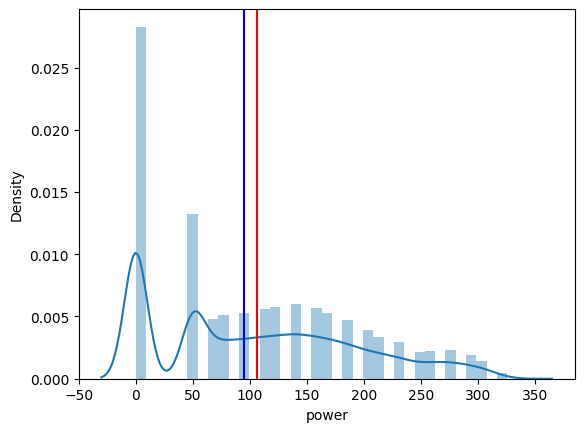

In [ ]:
sns.distplot(data_test_new.power)
plt.axvline(data_test_new.power.mean(),color='r')
plt.axvline(data_test_new.power.median(),color='b')
plt.show()

<ipython-input-31-f923385c01c2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test_new.time)
<ipython-input-31-f923385c01c2>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.axvline(data_test_new.mean(),color='r')


ValueError: ignored

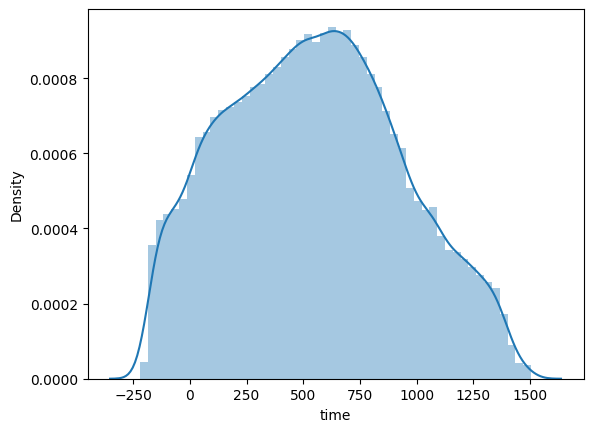

In [ ]:
sns.distplot(data_test_new.time)
plt.axvline(data_test_new.mean(),color='r')
plt.axvline(data_test_new.time.median(),color='b')
plt.show()

<ipython-input-32-844c0a1d5587>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test_new.VO2)


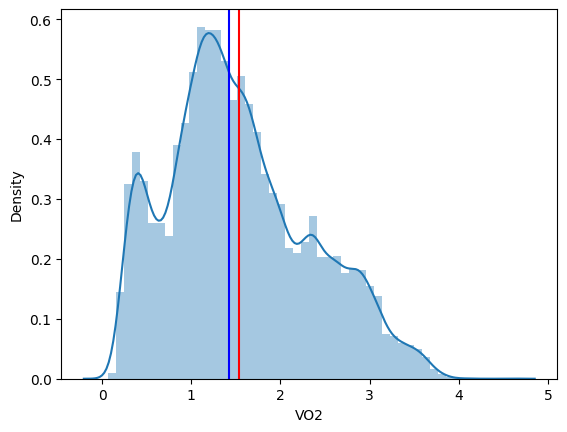

In [ ]:
sns.distplot(data_test_new.VO2)
plt.axvline(data_test_new.VO2.mean(),color='r')
plt.axvline(data_test_new.VO2.median(),color='b')
plt.show()

<Axes: xlabel='time'>

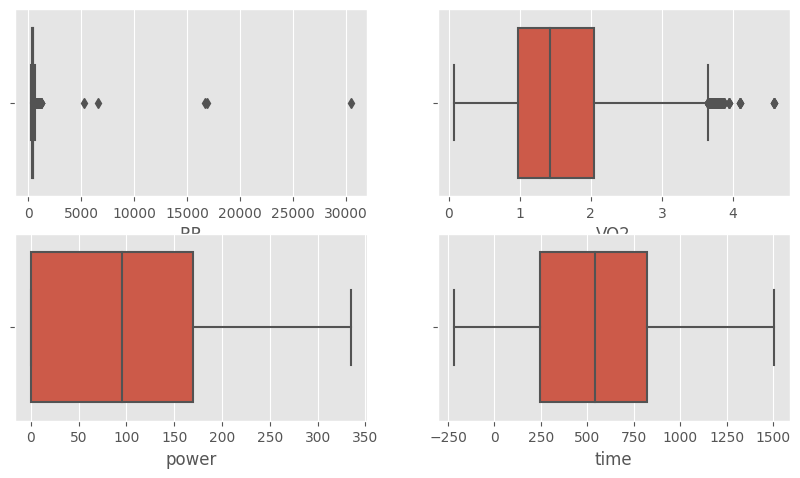

In [ ]:
plt.figure(figsize=(10,17))
plt.style.use('ggplot')
plt.subplot(6,2,1)
sns.boxplot(x = "RR",data = data_test_new)
plt.subplot(6,2,2)
sns.boxplot(x = "VO2",data = data_test_new)
plt.subplot(6,2,3)
sns.boxplot(x = "power",data = data_test_new)
plt.subplot(6,2,4)
sns.boxplot(x = "time",data = data_test_new)


<Axes: >

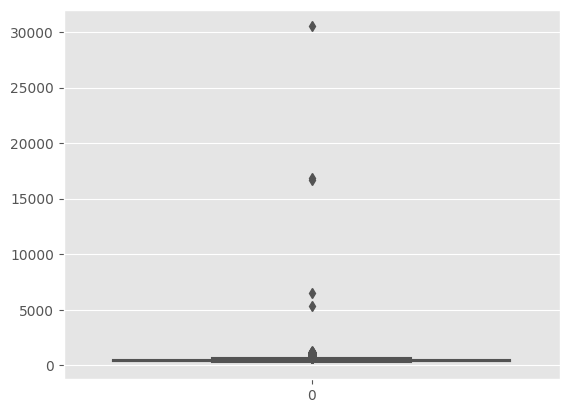

In [ ]:
sns.boxplot(data_test_new['RR'])

In [ ]:
def tukeys_method(df, variable):  #to detect outliers in variables
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr

    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence

    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence

    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss


In [ ]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data_test_new, "RR")
print(probable_outliers_tm)
print(possible_outliers_tm )

[15, 21, 24, 80, 152, 161, 163, 164, 170, 174, 178, 179, 182, 2418, 2419, 2422, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2433, 2434, 2435, 2436, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2469, 2470, 2471, 2472, 2473, 2475, 2476, 2478, 2480, 2482, 2483, 2485, 2491, 2492, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2506, 2507, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2524, 2526, 2527, 2529, 2530, 2531, 2532, 2533, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2544, 2545, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2604, 2610, 2614, 2633, 2639, 2640, 2641, 2642, 2643, 2644, 4403, 4404, 4405, 4406, 4411, 4439, 44

In [ ]:
upper_limit = data_test_new['RR'].quantile(0.99)
lower_limit = data_test_new['RR'].quantile(0.01)
upper_limit,lower_limit

(928.0, 312.0)

In [ ]:
data_test_new['RR'].quantile(0.25), data_test_new['RR'].quantile(0.75)

(352.0, 484.0)

In [ ]:
IQR = data_test_new['RR'].quantile(0.75) - data_test_new['RR'].quantile(0.25)
IQR

132.0

In [ ]:
Q1 = data_test_new['RR'].quantile(0.25)
Q3 =data_test_new['RR'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(154.0, 682.0)

In [ ]:
data_new1 = data_test_new[(data_test_new['RR'] < 675) & (data_test_new['RR'] >= 312)]

In [ ]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data_new1, "VO2")
print(probable_outliers_tm)
print(possible_outliers_tm )

[]
[31485, 31486, 31487, 31488, 31557, 31558, 31559, 31560, 31640, 31641, 31642, 31643, 31738, 31739, 31740, 31741, 31745, 31746, 31747, 31811, 31812, 31813, 31814, 31882, 31883, 31884, 31885, 31886, 31887, 31888, 31889, 31906, 31907, 31908, 31909, 31925, 31926, 31927, 31976, 31977, 31978, 31979, 32010, 32011, 32012, 32013, 32014, 32015, 32016, 32017, 32018, 32019, 32020, 32043, 32044, 32045, 32046, 32047, 32048, 32049, 32083, 32084, 32085, 32086, 32087, 32088, 32089, 32090, 32091, 32112, 32113, 32114, 32138, 32139, 32140, 32141, 35332, 35333, 35334, 35335, 35336, 35337, 35338, 35395, 35396, 35397, 35468, 35469, 35470, 35529, 35530, 35531, 35535, 35536, 35537, 35538, 35539, 35540, 35541, 35542, 35543, 35544, 35545, 35546, 35562, 35563, 35564, 35565, 35578, 35579, 35580, 35581, 35582, 35583, 35584, 35614, 35615, 35616, 35617, 35618, 35619, 35620, 35621, 35622, 35623, 35624, 35625, 35626, 35627, 35652, 35653, 35654, 35655, 35656, 35657, 35671, 35672, 35673, 35674, 35675, 35676]


<Axes: >

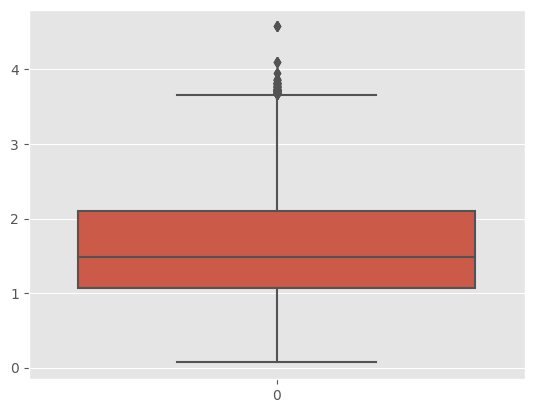

In [ ]:
sns.boxplot(data_new1['VO2'])

In [ ]:
data_new1['VO2'].quantile(0.25), data_new1['VO2'].quantile(0.75)

(1.063599375, 2.104904719)

In [ ]:
IQR=data_new1['VO2'].quantile(0.75) - data_new1['VO2'].quantile(0.25)
IQR

1.041305344

In [ ]:
Q1 = data_new1['VO2'].quantile(0.25)
Q3 = data_new1['VO2'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-0.49835864100000005, 3.6668627349999996)

In [ ]:
data_new1 = data_new1.loc[data_new1['VO2']<= 3.5]
data_test.shape, data_new1.shape

((52062, 5), (47901, 5))

In [ ]:
#data_new1['VO2'].loc[data_new1['VO2']<1]=Q1

In [ ]:
data_new1.describe(include=[int, float])

,time,RR,VO2,power
count,47901.000000,47901.000000,47901.000000,47901.000000
mean,582.860408,416.497777,1.593250,111.158640
std,356.924008,75.534637,0.736069,85.035544
min,-209.956000,312.000000,0.069354,0.000000
25%,300.728000,352.000000,1.057423,50.000000
50%,568.320000,404.000000,1.470382,110.000000
75%,830.804000,468.000000,2.068465,170.000000
max,1504.056000,672.000000,3.499992,335.000000


<Axes: >

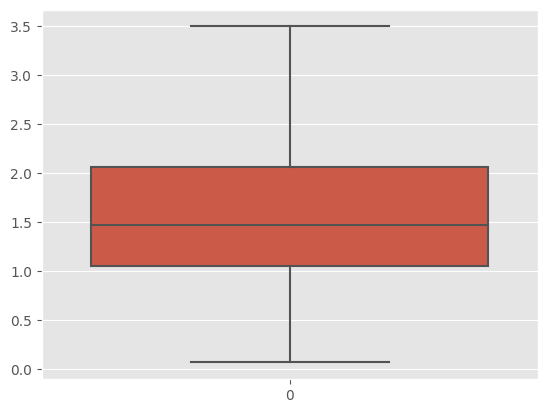

In [ ]:
sns.boxplot(data_new1['VO2'])

In [ ]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data_new1, "power")
print(probable_outliers_tm)
print(possible_outliers_tm )

[]
[]


<Axes: >

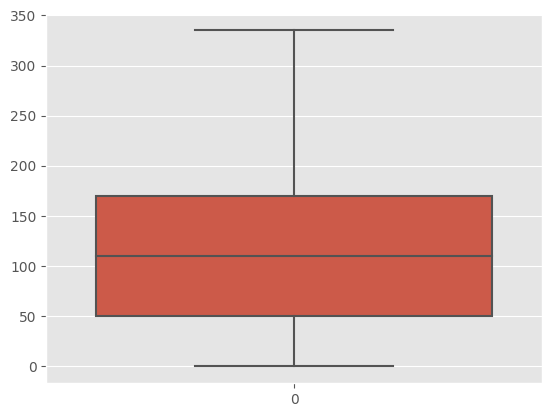

In [ ]:
import seaborn as sns
sns.boxplot(data_new1['power'])

In [ ]:
data_new1['power'].quantile(0.25), data_new1['power'].quantile(0.75)

(50.0, 170.0)

In [ ]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data_test, "time")
print(probable_outliers_tm)
print(possible_outliers_tm )

[]
[]


<Axes: >

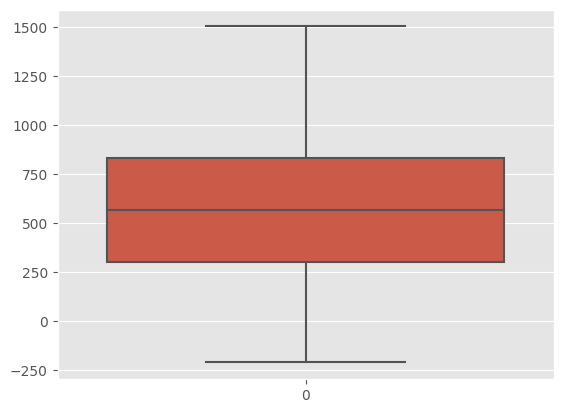

In [ ]:
sns.boxplot(data_new1['time'])

In [ ]:
data_new1.shape

(47901, 5)

<ipython-input-61-1f717b95b78f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new1.RR)


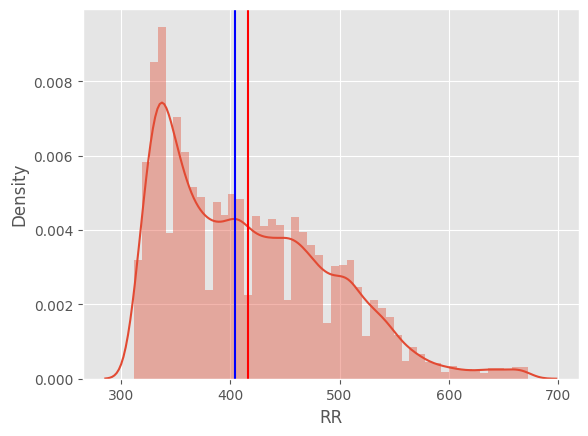

In [ ]:
sns.distplot(data_new1.RR)
plt.axvline(data_new1.RR.mean(),color='r')
plt.axvline(data_new1.RR.median(),color='b')
plt.show()

<ipython-input-62-11076e18c061>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new1.VO2)


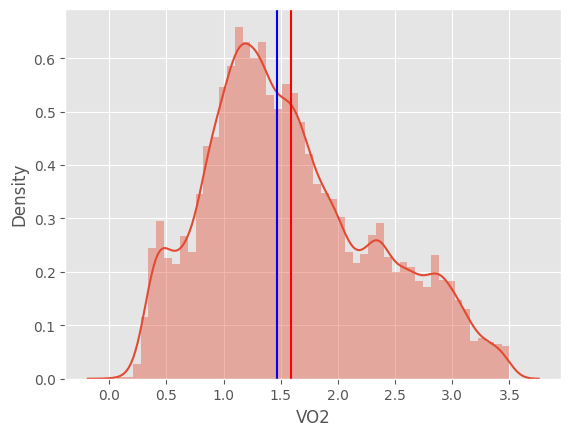

In [ ]:
sns.distplot(data_new1.VO2)
plt.axvline(data_new1.VO2.mean(),color='r')
plt.axvline(data_new1.VO2.median(),color='b')
plt.show()

<ipython-input-63-328cbd0190c2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new1.power)


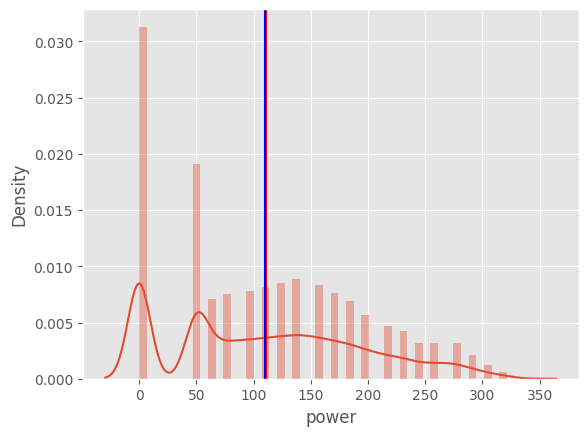

In [ ]:
sns.distplot(data_new1.power)
plt.axvline(data_new1.power.mean(),color='r')
plt.axvline(data_new1.power.median(),color='b')
plt.show()

In [ ]:
data_new1

,ID,time,RR,VO2,power
0,1,-130.840,672.0,0.302008,0
1,1,-130.168,672.0,0.302008,0
2,1,-129.536,632.0,0.301336,0
28,1,-109.280,672.0,0.310178,0
35,1,-104.280,660.0,0.329340,0
...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0
52058,18,947.816,528.0,0.507071,0
52059,18,948.344,528.0,0.507071,0
52060,18,948.884,540.0,0.507071,0


In [ ]:
data_new1['HR']=60000/data_new1['RR']

In [ ]:
data_new1

,ID,time,RR,VO2,power,HR
0,1,-130.840,672.0,0.302008,0,89.285714
1,1,-130.168,672.0,0.302008,0,89.285714
2,1,-129.536,632.0,0.301336,0,94.936709
28,1,-109.280,672.0,0.310178,0,89.285714
35,1,-104.280,660.0,0.329340,0,90.909091
...,...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0,111.940299
52058,18,947.816,528.0,0.507071,0,113.636364
52059,18,948.344,528.0,0.507071,0,113.636364
52060,18,948.884,540.0,0.507071,0,111.111111


In [ ]:

data = data_new1.groupby("ID", as_index=False)["HR"].max()

data

,ID,HR
0,1,192.307692
1,2,192.307692
2,3,182.926829
3,4,192.307692
4,5,189.873418
5,6,192.307692
6,7,189.873418
7,8,192.307692
8,9,189.873418
9,10,192.307692


In [ ]:
data_info1= pd.merge(data_info, data, on="ID")


In [ ]:
data_info1

,ID,age,Weight,Height,P_vt1,P_vt2,sport,HR
0,1,15,53.7,161,50,140,fencing,192.307692
1,2,15,56.2,162,80,127,fencing,192.307692
2,3,16,89.9,191,155,300,fencing,182.926829
3,4,16,76.5,180,215,275,fencing,192.307692
4,5,17,76.4,186,110,172,fencing,189.873418
5,6,17,65.6,169,131,186,fencing,192.307692
6,7,15,49.8,165,65,108,fencing,189.873418
7,8,15,51.2,165,80,133,fencing,192.307692
8,9,14,57.1,176,50,125,fencing,189.873418
9,10,14,58.8,177,101,162,fencing,192.307692


In [ ]:
data_info1.rename(columns = {'HR':'HRmax'}, inplace = True)

In [ ]:
data_info1

,ID,age,Weight,Height,P_vt1,P_vt2,sport,HRmax
0,1,15,53.7,161,50,140,fencing,192.307692
1,2,15,56.2,162,80,127,fencing,192.307692
2,3,16,89.9,191,155,300,fencing,182.926829
3,4,16,76.5,180,215,275,fencing,192.307692
4,5,17,76.4,186,110,172,fencing,189.873418
5,6,17,65.6,169,131,186,fencing,192.307692
6,7,15,49.8,165,65,108,fencing,189.873418
7,8,15,51.2,165,80,133,fencing,192.307692
8,9,14,57.1,176,50,125,fencing,189.873418
9,10,14,58.8,177,101,162,fencing,192.307692


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

data_info1.to_csv('/content/drive/My Drive/data_info_clean.csv', index=False)

In [ ]:
data_new1.to_csv('/content/drive/My Drive/data_test_clean.csv', index=False)